## Сорокин Евгений

# 5. Метеоритная защита земли
1. Определите местоположение появления метеорита с наибольшим количеством высвободившейся энергии.
2. Определите метеорит с максимальной и минимальной скоростью.
3. Определите место максимальной концентрации метеоритов.
4. Определите время года, в которое вероятность появления метеоритов максимальна. Постройте график.
5. Удалите строки данных, в которых для метеоритов не указана скорость. Выведите размер набора данных до и после удаления.
6. Построить график, на котором по оси ОХ отложено время суток, по OY – частота появления метеоритов.
7. Заполните строки в которых для метеоритов не указана скорость.
8. Определите месяц года, для которого появление метеоритов наиболее вероятно (постройте необходимые графики).
9. Вычислите корреляцию Пирсона и Спирмена между признаками Altitude и Total Radiated Energy. Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков. Оцените значение p-value.


In [4]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
plt.style.use('ggplot')  # Красивые графики

In [5]:
fireball_df = pd.read_csv('cneos_fireball_data.csv') # загрузил данные в объект fireball_df
print(fireball_df.head())

  Peak Brightness Date/Time (UT) Latitude (deg.) Longitude (deg.)  \
0            2017-07-31 22:01:35           24.7N           118.5W   
1            2017-07-23 06:12:38            6.6S            69.7W   
2            2017-07-13 09:30:36           23.1N            60.7E   
3            2017-06-30 14:26:45           34.3S           134.5E   
4            2017-06-23 20:21:55           57.0N           143.7E   

   Altitude (km)  Velocity (km/s)    vx    vy    vz  \
0            NaN              NaN   NaN   NaN   NaN   
1           38.0             17.2  -0.4   8.7 -14.8   
2           35.0             13.7 -10.0  -6.5  -6.8   
3           20.0             15.2  10.9  -9.7   4.2   
4           35.1             24.3  17.7  13.1 -10.3   

   Total Radiated Energy (J)  Calculated Total Impact Energy (kt)  
0               5.800000e+10                                 0.19  
1               3.500000e+10                                 0.12  
2               7.300000e+10                      

In [6]:
fireball_df

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,2017-07-31 22:01:35,24.7N,118.5W,NaN,NaN,NaN,NaN,NaN,5.800000e+10,0.190
1,2017-07-23 06:12:38,6.6S,69.7W,38.0,17.2,-0.4,8.7,-14.8,3.500000e+10,0.120
2,2017-07-13 09:30:36,23.1N,60.7E,35.0,13.7,-10.0,-6.5,-6.8,7.300000e+10,0.230
3,2017-06-30 14:26:45,34.3S,134.5E,20.0,15.2,10.9,-9.7,4.2,9.400000e+10,0.290
4,2017-06-23 20:21:55,57.0N,143.7E,35.1,24.3,17.7,13.1,-10.3,1.840000e+11,0.520
...,...,...,...,...,...,...,...,...,...,...
714,1993-11-29 17:48:41,26.5N,78.3E,NaN,NaN,NaN,NaN,NaN,2.600000e+10,0.092
715,1993-10-31 03:39:27,51.3N,100.9W,NaN,NaN,NaN,NaN,NaN,4.000000e+10,0.130
716,1991-10-04 09:22:47,78.7N,6.3E,NaN,NaN,NaN,NaN,NaN,5.500000e+11,1.400
717,1990-10-01 03:51:47,7.5N,142.8E,NaN,NaN,NaN,NaN,NaN,2.500000e+12,5.200


In [155]:
fireball_df['Altitude (km)'].max() # скорость самого быстрого метеорита

74.0

# 1

### местоположение метеорита с наибольшей высвобоившейся энергией

In [156]:
maximum = fireball_df[fireball_df['Calculated Total Impact Energy (kt)'] ==
                      fireball_df['Calculated Total Impact Energy (kt)'].max()]
maximum[['Latitude (deg.)','Longitude (deg.)','Calculated Total Impact Energy (kt)']]

,Latitude (deg.),Longitude (deg.),Calculated Total Impact Energy (kt)
146,54.8N,61.1E,440.0


# 2

### метеорит с масимальной скоростью

In [157]:
maximumV = fireball_df[fireball_df['Altitude (km)'] == fireball_df['Altitude (km)'].max()]
maximumV[['Peak Brightness Date/Time (UT)','Altitude (km)']]

,Peak Brightness Date/Time (UT),Altitude (km)
386,2005-11-02 05:16:47,74.0


### метеорит с минимальной скоростью

In [158]:
minimumV = fireball_df[fireball_df['Altitude (km)'] == fireball_df['Altitude (km)'].min()]
minimumV[['Peak Brightness Date/Time (UT)','Altitude (km)']]

,Peak Brightness Date/Time (UT),Altitude (km)
399,2005-05-07 09:31:44,15.2


In [159]:
fireball_df['Latitude (deg.)'].value_counts()

50.2S    3
31.1S    3
8.0S     3
7.8N     3
49.2S    3
        ..
36.9S    1
69.9S    1
26.6S    1
11.8N    1
63.1N    1
Name: Latitude (deg.), Length: 433, dtype: int64

In [5]:
fireball_df['Longitude (deg.)'].value_counts()

64.6W     4
37.2W     3
21.0E     3
5.5W      2
166.0W    2
         ..
95.2E     1
93.6W     1
120.6E    1
113.4W    1
77.0W     1
Name: Longitude (deg.), Length: 499, dtype: int64

# 3

### наибольшее скопление метеоритов по следующий координатам

In [160]:
i1 = fireball_df['Longitude (deg.)'].value_counts()
i2 = fireball_df['Latitude (deg.)'].value_counts()
print(i1.index[0] + ' ' + i2.index[0])

64.6W 50.2S


# 4

### Определим время года, в которое вероятность появления метеоритов максимальна

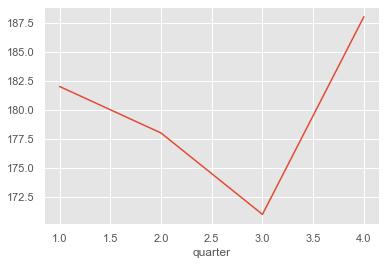

In [25]:
month_fireball_df = fireball_df # сохдадим новый объект, дабы ненароком не испорить основной
month_fireball_df['Peak Brightness Date/Time (UT)'] = pd.to_datetime(fireball_df['Peak Brightness Date/Time (UT)']) # преобразуем строку даты в дату
month_fireball_df['quarter'] = month_fireball_df['Peak Brightness Date/Time (UT)'].dt.quarter # создадим новый столбец с четвертями года
month_fireball_df.groupby(['quarter'])['quarter'].count().plot() # построим график

# 5

In [30]:
fireball_df

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt),Month
0,2017-07-31 22:01:35,24.7N,118.5W,NaN,NaN,NaN,NaN,NaN,5.800000e+10,0.190,07
1,2017-07-23 06:12:38,6.6S,69.7W,38.0,17.2,-0.4,8.7,-14.8,3.500000e+10,0.120,07
2,2017-07-13 09:30:36,23.1N,60.7E,35.0,13.7,-10.0,-6.5,-6.8,7.300000e+10,0.230,07
3,2017-06-30 14:26:45,34.3S,134.5E,20.0,15.2,10.9,-9.7,4.2,9.400000e+10,0.290,06
4,2017-06-23 20:21:55,57.0N,143.7E,35.1,24.3,17.7,13.1,-10.3,1.840000e+11,0.520,06
...,...,...,...,...,...,...,...,...,...,...,...
714,1993-11-29 17:48:41,26.5N,78.3E,NaN,NaN,NaN,NaN,NaN,2.600000e+10,0.092,11
715,1993-10-31 03:39:27,51.3N,100.9W,NaN,NaN,NaN,NaN,NaN,4.000000e+10,0.130,10
716,1991-10-04 09:22:47,78.7N,6.3E,NaN,NaN,NaN,NaN,NaN,5.500000e+11,1.400,10
717,1990-10-01 03:51:47,7.5N,142.8E,NaN,NaN,NaN,NaN,NaN,2.500000e+12,5.200,10


In [36]:
drop_fireball_df= fireball_df.dropna(axis=0, how='any', subset=['Velocity (km/s)'])
drop_fireball_df

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt),Month
1,2017-07-23 06:12:38,6.6S,69.7W,38.0,17.2,-0.4,8.7,-14.8,3.500000e+10,0.12,07
2,2017-07-13 09:30:36,23.1N,60.7E,35.0,13.7,-10.0,-6.5,-6.8,7.300000e+10,0.23,07
3,2017-06-30 14:26:45,34.3S,134.5E,20.0,15.2,10.9,-9.7,4.2,9.400000e+10,0.29,06
4,2017-06-23 20:21:55,57.0N,143.7E,35.1,24.3,17.7,13.1,-10.3,1.840000e+11,0.52,06
5,2017-06-20 13:41:32,54.2S,133.0E,33.3,13.6,8.7,-5.7,8.8,6.360000e+11,1.60,06
...,...,...,...,...,...,...,...,...,...,...,...
450,2004-04-22 04:21:49,44.3S,83.3E,29.6,16.3,8.5,-12.1,-6.8,6.240000e+11,1.50,04
451,2004-04-06 03:24:49,12.0S,162.8E,35.0,25.6,10.5,-23.2,-2.9,4.330000e+11,1.10,04
462,2003-11-10 13:54:06,64.5S,136.2E,23.0,20.1,14.8,-8.7,10.4,5.180000e+11,1.30,11
467,2003-09-27 12:59:02,21.0N,86.6E,26.0,18.2,-1.0,-5.4,-17.3,2.150000e+12,4.60,09


### размер набора данных до удаления строк, в которых для метеоритов не указана скорость

In [37]:
fireball_df['Peak Brightness Date/Time (UT)'].count() 

719

### размер набора данных после удаления строк, в которых для метеоритов не указана скорость

In [38]:
drop_fireball_df['Peak Brightness Date/Time (UT)'].count() 

157

# 6

### время дня, в которое скопение метеориов максимально

In [49]:
fireball_df.head()

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt),Month,Hour
0,2017-07-31 22:01:35,24.7N,118.5W,NaN,NaN,NaN,NaN,NaN,5.800000e+10,0.19,07,22
1,2017-07-23 06:12:38,6.6S,69.7W,38.0,17.2,-0.4,8.7,-14.8,3.500000e+10,0.12,07,06
2,2017-07-13 09:30:36,23.1N,60.7E,35.0,13.7,-10.0,-6.5,-6.8,7.300000e+10,0.23,07,09
3,2017-06-30 14:26:45,34.3S,134.5E,20.0,15.2,10.9,-9.7,4.2,9.400000e+10,0.29,06,14
4,2017-06-23 20:21:55,57.0N,143.7E,35.1,24.3,17.7,13.1,-10.3,1.840000e+11,0.52,06,20


In [40]:
# создадим объект, в который занесём часы падения метеоритов
def get_hour (date):
    temp = date.split(' ')[1].strip()
    return temp.split(':')[0].strip()

hour = fireball_df['Peak Brightness Date/Time (UT)'].apply(get_hour)
hour.head()

0    22
1    06
2    09
3    14
4    20
Name: Peak Brightness Date/Time (UT), dtype: object

In [43]:
fireball_df['Hour'] = hour # добавим часы в таблицу основных данных
fireball_df.head()

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt),Month,Hour
0,2017-07-31 22:01:35,24.7N,118.5W,NaN,NaN,NaN,NaN,NaN,5.800000e+10,0.19,07,22
1,2017-07-23 06:12:38,6.6S,69.7W,38.0,17.2,-0.4,8.7,-14.8,3.500000e+10,0.12,07,06
2,2017-07-13 09:30:36,23.1N,60.7E,35.0,13.7,-10.0,-6.5,-6.8,7.300000e+10,0.23,07,09
3,2017-06-30 14:26:45,34.3S,134.5E,20.0,15.2,10.9,-9.7,4.2,9.400000e+10,0.29,06,14
4,2017-06-23 20:21:55,57.0N,143.7E,35.1,24.3,17.7,13.1,-10.3,1.840000e+11,0.52,06,20


In [47]:
hour_counts = fireball_df.groupby('Hour').count()
hour_counts['Peak Brightness Date/Time (UT)'] # используем дату как счётчик количества часов

Hour
00    25
01    34
02    28
03    35
04    37
05    25
06    36
07    33
08    26
09    29
10    26
11    38
12    34
13    34
14    28
15    26
16    29
17    38
18    22
19    27
20    29
21    24
22    33
23    23
Name: Peak Brightness Date/Time (UT), dtype: int64

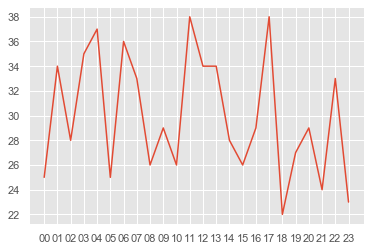

In [48]:
plt.plot(hour_counts.index, hour_counts['Peak Brightness Date/Time (UT)']) 
# построим график (по оси ox часы, по оси oy количество дат, в которые падали метеориты)

максимальное скопление метеоритов наблдается за час перед обедом (11 a.m.) и за час перед ужином (5 p.m.)

# 7

### заполнить строки в которых для метеоритов не указана скорость

In [51]:
fireball_df.head()

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt),Month,Hour
0,2017-07-31 22:01:35,24.7N,118.5W,NaN,NaN,NaN,NaN,NaN,5.800000e+10,0.19,07,22
1,2017-07-23 06:12:38,6.6S,69.7W,38.0,17.2,-0.4,8.7,-14.8,3.500000e+10,0.12,07,06
2,2017-07-13 09:30:36,23.1N,60.7E,35.0,13.7,-10.0,-6.5,-6.8,7.300000e+10,0.23,07,09
3,2017-06-30 14:26:45,34.3S,134.5E,20.0,15.2,10.9,-9.7,4.2,9.400000e+10,0.29,06,14
4,2017-06-23 20:21:55,57.0N,143.7E,35.1,24.3,17.7,13.1,-10.3,1.840000e+11,0.52,06,20


In [86]:
full_fireball_df = fireball_df.fillna(fireball_df.mean()) # заполним все пропуски средним значением по столбцу
full_fireball_df # пока удалось заполнить только все пропуски. Не выборочно!

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt),Month,Hour
0,2017-07-31 22:01:35,24.7N,118.5W,36.511726,17.950318,0.310828,-2.388535,-1.031847,5.800000e+10,0.190,07,22
1,2017-07-23 06:12:38,6.6S,69.7W,38.000000,17.200000,-0.400000,8.700000,-14.800000,3.500000e+10,0.120,07,06
2,2017-07-13 09:30:36,23.1N,60.7E,35.000000,13.700000,-10.000000,-6.500000,-6.800000,7.300000e+10,0.230,07,09
3,2017-06-30 14:26:45,34.3S,134.5E,20.000000,15.200000,10.900000,-9.700000,4.200000,9.400000e+10,0.290,06,14
4,2017-06-23 20:21:55,57.0N,143.7E,35.100000,24.300000,17.700000,13.100000,-10.300000,1.840000e+11,0.520,06,20
...,...,...,...,...,...,...,...,...,...,...,...,...
714,1993-11-29 17:48:41,26.5N,78.3E,36.511726,17.950318,0.310828,-2.388535,-1.031847,2.600000e+10,0.092,11,17
715,1993-10-31 03:39:27,51.3N,100.9W,36.511726,17.950318,0.310828,-2.388535,-1.031847,4.000000e+10,0.130,10,03
716,1991-10-04 09:22:47,78.7N,6.3E,36.511726,17.950318,0.310828,-2.388535,-1.031847,5.500000e+11,1.400,10,09
717,1990-10-01 03:51:47,7.5N,142.8E,36.511726,17.950318,0.310828,-2.388535,-1.031847,2.500000e+12,5.200,10,03


# 8

### месяц года, в которое скопение метеориов максимально

In [7]:
# создадим объект, в который занесём месяца
def get_month (date):
    return date.split('-')[1].strip() # ('-') это моё выражение лица, когда я это писал. С++ легче для понимания

month = fireball_df['Peak Brightness Date/Time (UT)'].apply(get_month)
month.head()

0    07
1    07
2    07
3    06
4    06
Name: Peak Brightness Date/Time (UT), dtype: object

In [8]:
month # получили месяцы падения каждого метеорита из даты

0      07
1      07
2      07
3      06
4      06
       ..
714    11
715    10
716    10
717    10
718    04
Name: Peak Brightness Date/Time (UT), Length: 719, dtype: object

In [9]:
fireball_df['Month'] = month # добавили столбец месяцев в общие данные

In [10]:
fireball_df.head()

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt),Month
0,2017-07-31 22:01:35,24.7N,118.5W,NaN,NaN,NaN,NaN,NaN,5.800000e+10,0.19,07
1,2017-07-23 06:12:38,6.6S,69.7W,38.0,17.2,-0.4,8.7,-14.8,3.500000e+10,0.12,07
2,2017-07-13 09:30:36,23.1N,60.7E,35.0,13.7,-10.0,-6.5,-6.8,7.300000e+10,0.23,07
3,2017-06-30 14:26:45,34.3S,134.5E,20.0,15.2,10.9,-9.7,4.2,9.400000e+10,0.29,06
4,2017-06-23 20:21:55,57.0N,143.7E,35.1,24.3,17.7,13.1,-10.3,1.840000e+11,0.52,06


In [24]:
month_counts = fireball_df.groupby('Month').count()
month_counts['Peak Brightness Date/Time (UT)'] # используем дату как счётчик количества месяцев

Month
01    60
02    61
03    61
04    63
05    56
06    59
07    60
08    59
09    52
10    65
11    65
12    58
Name: Peak Brightness Date/Time (UT), dtype: int64

In [27]:
month_counts.index = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] # переименуем месяцы
month_counts['Peak Brightness Date/Time (UT)']

Jan    60
Feb    61
Mar    61
Apr    63
May    56
Jun    59
Jul    60
Aug    59
Sep    52
Oct    65
Nov    65
Dec    58
Name: Peak Brightness Date/Time (UT), dtype: int64

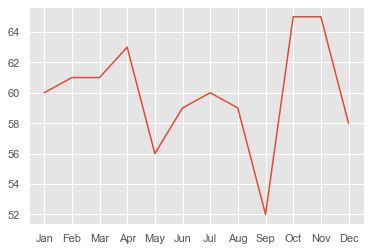

In [29]:
plt.plot(month_counts.index, month_counts['Peak Brightness Date/Time (UT)']) 
# построим график (по оси ox месяцы, по оси oy количество дат, в которые падали метеориты)

максимально скопление метеоритов в начале осени и в середине весны

# 9

### Вычислите корреляцию Пирсона и Спирмена между признаками Altitude и Total Radiated Energy. Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков. Оцените значение p-value.

In [95]:
fireball_df[['Altitude (km)','Total Radiated Energy (J)']].corr(method='pearson')

,Altitude (km),Total Radiated Energy (J)
Altitude (km),1.000000,-0.085787
Total Radiated Energy (J),-0.085787,1.000000


In [96]:
fireball_df[['Altitude (km)','Total Radiated Energy (J)']].corr(method='spearman')

,Altitude (km),Total Radiated Energy (J)
Altitude (km),1.00000,-0.12671
Total Radiated Energy (J),-0.12671,1.00000


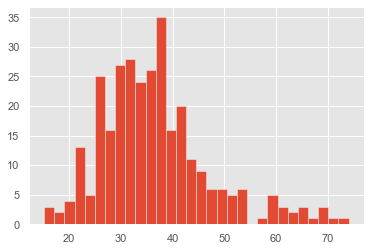

In [98]:
fireball_df['Altitude (km)'].hist(bins = 30)

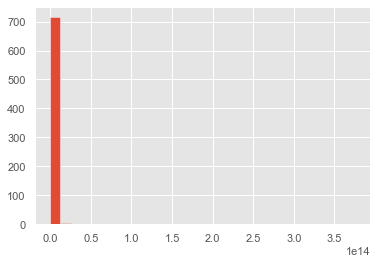

In [104]:
fireball_df['Total Radiated Energy (J)'].hist(bins = 30)

в обоих случая уровень значимости больше |0,05|, следовательно мы можем принять гипотезу о наличии монотонной связи. знак "-" говорит нам о том, что связ отрицательна, то есть увеличение одной переменной соответствует уменьшению другой.